In [21]:
using CSV, DataFrames, CairoMakie, wgregseq

wgregseq.plotting_style.default_makie!()

In [22]:
wgregseq.plotting_style.my_color_dict

Dict{String, String} with 15 entries:
  "orange2" => "#fecc96"
  "green3"  => "#e6f0cb"
  "blue2"   => "#8d92c8"
  "blue3"   => "#dbddef"
  "yellow3" => "#fff8c1"
  "purple3" => "#e9d1da"
  "green1"  => "#a8cf38"
  "blue1"   => "#324fa2"
  "yellow1" => "#fce317"
  "green2"  => "#d1e39b"
  "yellow2" => "#fff182"
  "orange1" => "#f47c20"
  "purple1" => "#9f2260"
  "purple2" => "#cca6b6"
  "orange3" => "#ffe4c6"

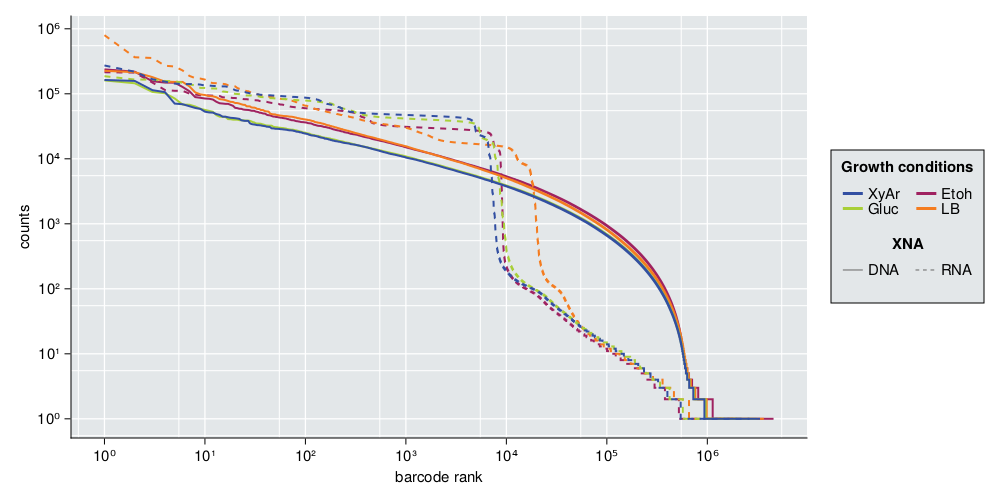

In [42]:
fig = Figure(resolution=(1000, 500))
ax = Axis(
    fig[1, 1],
    xlabel="barcode rank",
    ylabel="counts",
    yscale=log10,
    xscale=log10
    )

color_dict = Dict(
    "LB"=>wgregseq.plotting_style.my_color_dict["orange1"],
    "Etoh"=>wgregseq.plotting_style.my_color_dict["purple1"],
    "Gluc"=>wgregseq.plotting_style.my_color_dict["green1"],
    "XyAr"=>wgregseq.plotting_style.my_color_dict["blue1"]
)

style_dict = Dict(
    "gDNA"=>:solid,
    "cDNA"=>:dash
)

for file in [
        "Etoh_gDNA_collapsed.txt",
        "Etoh_cDNA_collapsed.txt",
        "LB_gDNA_collapsed.txt",
        "LB_cDNA_collapsed.txt",
        "Gluc_gDNA_collapsed.txt",
        "Gluc_cDNA_collapsed.txt",
        "XyAr_gDNA_collapsed.txt",
        "XyAr_cDNA_collapsed.txt"
        ]
        

    df = CSV.read(
        "../../../data/processed_barcodes/20221114_barcode/"*file, 
        DataFrame, 
        ignorerepeated=true, 
        delim=" ", 
        header=["counts", "barcodes"]
        )
    gc, xna = split(file, '_')[1:2]
    lines!(
        ax, 
        df.counts,
        color=color_dict[gc],
        linestyle=style_dict[xna],
        linewidth=2
    )
end
ax.yticklabelsize = 15
ax.xticklabelsize = 15
ax.xlabelsize = 15
ax.ylabelsize = 15
growth_conditions = keys(color_dict) |> collect
growth_conditions_lines = [LineElement(color = color_dict[gc], linewidth=3) for gc in growth_conditions]

group_color = [
    LineElement(color = :gray, linestyle=:solid),
    LineElement(color = :gray, linestyle=:dash),
    LineElement(color = :gray, linestyle=:solid, linewidth=0),
    LineElement(color = :gray, linestyle=:solid, linewidth=0)
]



legends = Legend(fig,
    [growth_conditions_lines, group_color],
    [growth_conditions, ["DNA", "RNA", " ", " "]],
    ["Growth conditions", "XNA"],
    nbanks=2,
    titlesize=15,
    labelsize=15
    
)
fig[1, 2] = legends
#axislegend(ax)
fig

In [ ]:
df = CSV.read(
        "../../../data/processed_barcodes/20221114_barcode/", 
        DataFrame, 
        ignorerepeated=true, 
        delim=" ", 
        header=["counts", "barcodes"]
        )